In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_multiome_2022_scVI_embedding.h5ad")

In [4]:
adata.obs['time'] = adata.obs.apply(lambda x: 14.5 if x["sample"]=="E14.5" else 15.5, axis=1)

In [5]:
adata

AnnData object with n_obs × n_vars = 16953 × 1200
    obs: 'n_counts', 'sample', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'total_counts_rank', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'log_nCount_ATAC', 'log_nFeature_ATAC', 'scrublet_scores', 'scrublet_doublets', 'scrublet_doublets_cat', 'dd_doublets', 'dd_scores', 'dd_log_p_values', 'dd_voting_average', 'dd_-log_p_values', 'dd_doublets_cat', 'pANN', 'DF_classifications_1', 'DF_classifications_2', 'pANN_SCT', 'DF_SCT_classifications_1', 'DF_SCT_classifications_2', 'df_doublets', 'scDblFinder.class', 'doublet_calls', 'final_doublets', 'final_doublets_cat', 'batch', 'size_factors', 'mt_frac

In [13]:
adata = adata[~adata.obs["celltype"].isin(["Mat. Acinar", "Imm. Acinar", "Ductal", "Prlf. Ductal"])]

In [14]:
adata

View of AnnData object with n_obs × n_vars = 9451 × 1200
    obs: 'n_counts', 'sample', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'total_counts_rank', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'log_nCount_ATAC', 'log_nFeature_ATAC', 'scrublet_scores', 'scrublet_doublets', 'scrublet_doublets_cat', 'dd_doublets', 'dd_scores', 'dd_log_p_values', 'dd_voting_average', 'dd_-log_p_values', 'dd_doublets_cat', 'pANN', 'DF_classifications_1', 'DF_classifications_2', 'pANN_SCT', 'DF_SCT_classifications_1', 'DF_SCT_classifications_2', 'df_doublets', 'scDblFinder.class', 'doublet_calls', 'final_doublets', 'final_doublets_cat', 'batch', 'size_factors', '

# PCA on GEX space

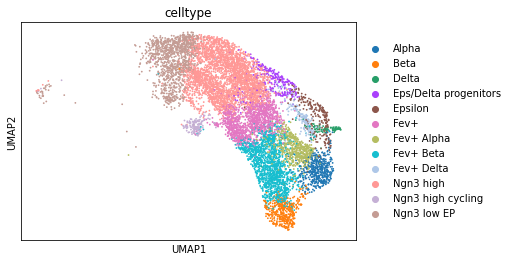

In [15]:
sc.pl.umap(adata, color="celltype")

In [16]:
tp0 = TemporalProblem(adata)
tp0 = tp0.score_genes_for_marginals(gene_set_proliferation="mouse", gene_set_apoptosis="mouse")
tp0 = tp0.prepare("time")

/home/icb/dominik.klein/miniconda3/envs/moscot_env/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


In [17]:
tp0 = tp0.solve(epsilon=1e-2, scale_cost="mean", tau_a=0.9, tau_b=0.99, max_iterations=1e5)

2022-08-08 09:56:48.942927: W external/org_tensorflow/tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 98.47MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


XlaRuntimeError: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 103252648 bytes.

In [ ]:
ct_desc = tp0.cell_transition(start=14.5, end=15.5, early_annotation="celltype", late_annotation="celltype", forward=True)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(ct_desc, annot=True, cmap="YlGnBu", ax=ax, fmt=".2f", annot_kws={"fontsize": 10})
plt.title("Descendants")
plt.show()

In [ ]:
ct_anc = tp0.cell_transition(start=14.5, end=15.5, early_annotation="celltype", late_annotation="celltype", forward=False)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(ct_anc, annot=True, cmap="YlGnBu", ax=ax, fmt=".2f", annot_kws={"fontsize": 10})
plt.title("Ancestors")
plt.show()

# scVI on GEX space

In [56]:
tp1 = TemporalProblem(adata)
tp1 = tp1.score_genes_for_marginals(gene_set_proliferation="mouse", gene_set_apoptosis="mouse")
tp1 = tp1.prepare("time", joint_attr="X_scVI")

In [57]:
tp1 = tp1.solve(epsilon=1e-2, scale_cost="mean")

2022-08-07 13:41:03.780817: E external/org_tensorflow/tensorflow/compiler/xla/pjrt/pjrt_stream_executor_client.cc:2130] Execution of replica 0 failed: INTERNAL: Failed to load in-memory CUBIN: CUDA_ERROR_OUT_OF_MEMORY: out of memory


XlaRuntimeError: INTERNAL: Failed to load in-memory CUBIN: CUDA_ERROR_OUT_OF_MEMORY: out of memory

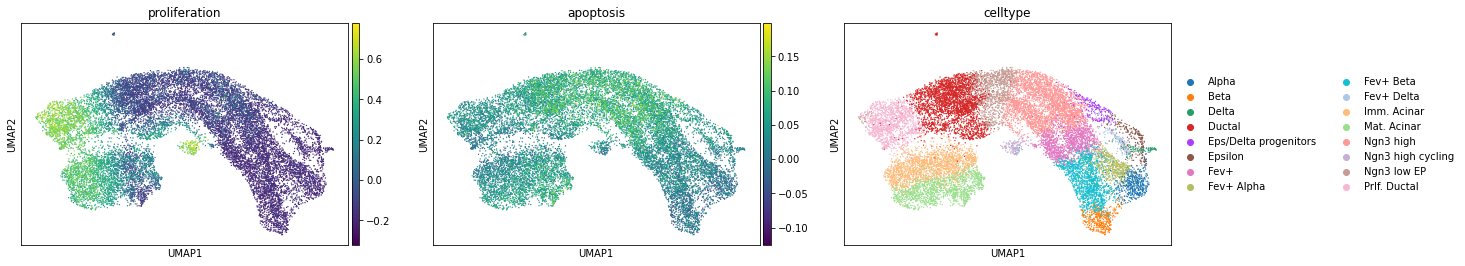

In [43]:
sc.pl.umap(adata, color=["proliferation", "apoptosis", "celltype"])

In [53]:
adata.obs["growth_rates"] = tp1.growth_rates

In [60]:
# what are the prior marginals?
adata.obs

,n_counts,sample,n_genes,log_genes,mt_frac,rp_frac,ambi_frac,total_counts_rank,n_genes_by_counts,log1p_n_genes_by_counts,...,G2M_score,phase,proliferation,celltype,_scvi_batch,_scvi_labels,_scvi_raw_norm_scaling,apoptosis,time,growth_rates
AAACAGCCAACAGCCT-1-0,8457.0,E14.5,3651,8.202756,0.008868,0.083126,0.297570,5666.0,3671,8.208492,...,-0.283421,G1,-0.239548,Fev+ Alpha,0,0,7.127584,-0.023855,14.5,0.922067
AAACAGCCAACCCTCC-1-0,7841.0,E14.5,3120,8.045588,0.011988,0.089912,0.250641,10002.0,3132,8.049746,...,-0.229097,G1,-0.181485,Fev+ Alpha,0,0,12.254903,-0.004491,14.5,0.894823
AAACAGCCACCTGTAA-1-0,9492.0,E14.5,3938,8.278428,0.010641,0.199220,0.436430,570.0,5021,8.521584,...,0.738100,G2M,0.492186,Imm. Acinar,0,0,4.868549,-0.005188,14.5,2.919701
AAACAGCCACTAAGCC-1-0,7915.0,E14.5,3318,8.107117,0.010360,0.080101,0.251073,7886.0,3333,8.111928,...,-0.249291,G1,-0.287808,Fev+ Beta,0,0,8.291874,0.028118,14.5,0.778818
AAACAGCCAGGATAAC-1-0,9193.0,E14.5,3666,8.206856,0.013706,0.161971,0.395085,4321.0,3685,8.212297,...,-0.137242,G1,-0.119041,Ngn3 high,0,0,12.690355,0.112071,14.5,0.489381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCTTGTTCG-1-1,9644.0,E15.5,4703,8.455956,0.009851,0.142679,0.355947,2634.0,4816,8.479907,...,-0.224130,G1,-0.098202,Ductal,0,0,7.479432,0.062872,15.5,NaN
TTTGTTGGTATTGAGT-1-1,8914.0,E15.5,3772,8.235361,0.005160,0.155261,0.356991,6322.0,3789,8.240121,...,-0.209148,G1,-0.209375,Ngn3 low EP,0,0,11.198209,0.031998,15.5,NaN
TTTGTTGGTCCTAAGA-1-1,9689.0,E15.5,4540,8.420682,0.003922,0.140262,0.341192,3430.0,4572,8.427925,...,-0.262677,G1,-0.163361,Ductal,0,0,8.417508,0.056533,15.5,NaN
TTTGTTGGTTAACAGT-1-1,9570.0,E15.5,4502,8.412277,0.010449,0.151411,0.361693,2869.0,4586,8.430981,...,0.092528,G2M,0.091656,Mat. Acinar,0,0,7.692307,0.034231,15.5,NaN


KeyError: 'b'

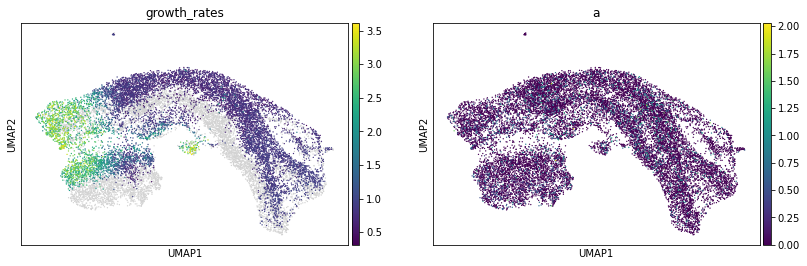

In [59]:
sc.pl.umap(adata, color=["growth_rates", "a", "b"])

In [48]:
adata.obs["posterior_a"] = tp1[14.5, 15.5].growth_rates
adata.obs["posterior_b"] = tp1[14.5, 15.5].solution.b

ValueError: Length of values (9832) does not match length of index (16953)

In [ ]:
adata.obs["posterior_a"] = 

In [ ]:
sc.pl.umap(adata, color=["proliferation", "apoptosis", "celltype"])

In [37]:
ct_desc_scvi = tp1.cell_transition(start=14.5, end=15.5, early_annotation="celltype", late_annotation="celltype", forward=True)

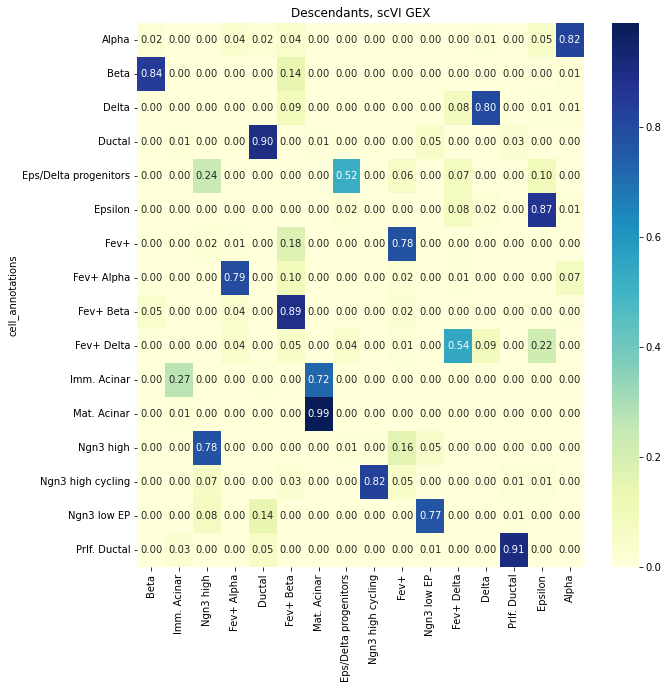

In [38]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(ct_desc_scvi, annot=True, cmap="YlGnBu", ax=ax, fmt=".2f", annot_kws={"fontsize": 10})
plt.title("Descendants, scVI GEX")
plt.show()

In [39]:
ct_anc_scvi = tp1.cell_transition(start=14.5, end=15.5, early_annotation="celltype", late_annotation="celltype", forward=False)

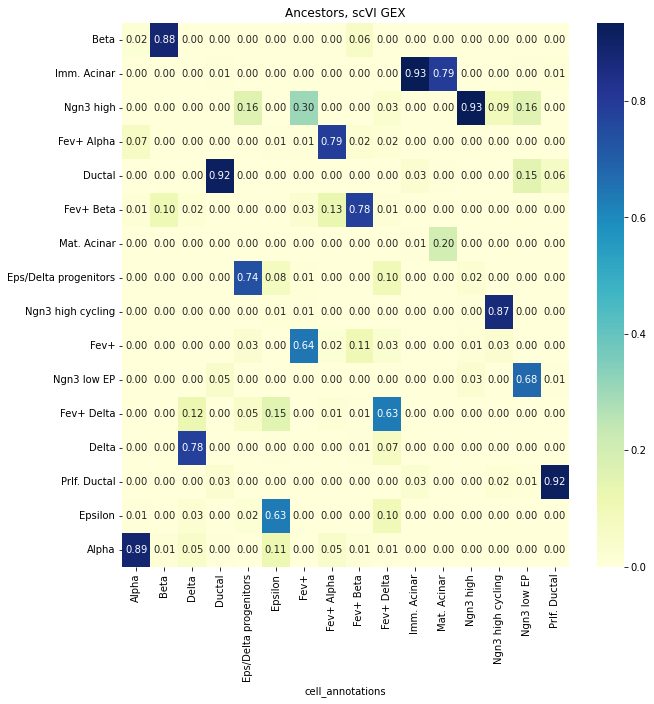

In [40]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(ct_anc_scvi, annot=True, cmap="YlGnBu", ax=ax, fmt=".2f", annot_kws={"fontsize": 10})
plt.title("Ancestors, scVI GEX")
plt.show()

# Compare PCA space with scVI space

Difference: PCA-GEX maps Trunk to Beta

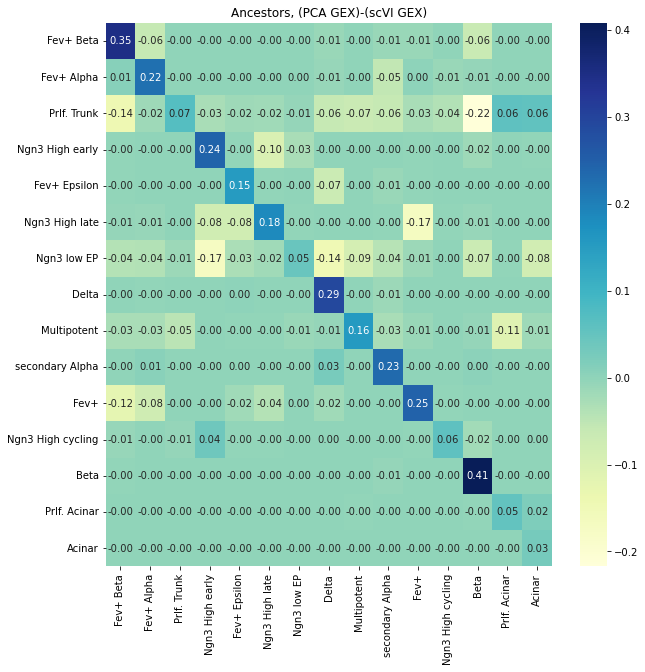

In [24]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(ct_anc - ct_anc_scvi, annot=True, cmap="YlGnBu", ax=ax, fmt=".2f", annot_kws={"fontsize": 10})
plt.title("Ancestors, (PCA GEX)-(scVI GEX)")
plt.show()

# PCA on GEX + PCA on ATAC space

In [92]:
from sklearn.metrics import pairwise_distances
import numpy as np

In [85]:
adata.obsm["GEX_pca"].std(), adata.obsm["ATAC_pca"].std()

(1.8982601, 15.407883)

In [90]:
gex_pca_tr = StandardScaler().fit_transform(adata.obsm["GEX_pca"])
atac_pca_tr = StandardScaler().fit_transform(adata.obsm["ATAC_pca"])

In [93]:
adata.obsm["joint_PCA"] = np.concatenate((gex_pca_tr, atac_pca_tr), axis=1)

In [79]:
C_gex = pairwise_distances(adata_gex[adata_gex.obs["time"]==0].obsm["X_pca"], adata_gex[adata_gex.obs["time"]==1].obsm["X_pca"], metric="sqeuclidean")
C_atac = pairwise_distances(adata_atac[adata_atac.obs["time"]==0].obsm["X_pca"], adata_atac[adata_atac.obs["time"]==1].obsm["X_pca"], metric="sqeuclidean")

In [119]:
tp2 = TemporalProblem(adata)
tp2 = tp2.prepare("time", joint_attr="joint_PCA")

In [120]:
tp2 = tp2.solve(epsilon=1e-3, scale_cost="mean", tau_a=1, tau_b=1)

In [121]:
ct_desc = tp2.cell_transition(early_cells="celltype", late_cells="celltype", start=0, end=1, forward=True)

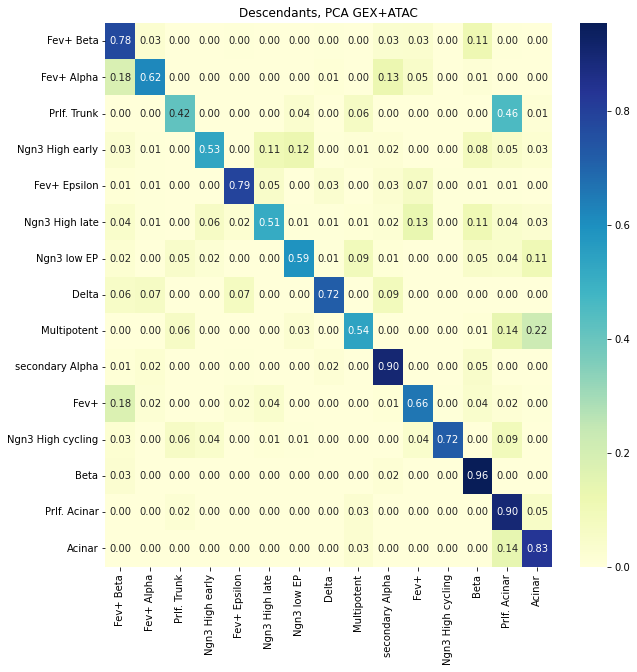

In [122]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(ct_desc, annot=True, cmap="YlGnBu", ax=ax, fmt=".2f", annot_kws={"fontsize": 10})
plt.title("Descendants, PCA GEX+ATAC")
plt.show()

In [103]:
ct_anc = tp2.cell_transition(early_cells="celltype", late_cells="celltype", start=0, end=1, forward=False)

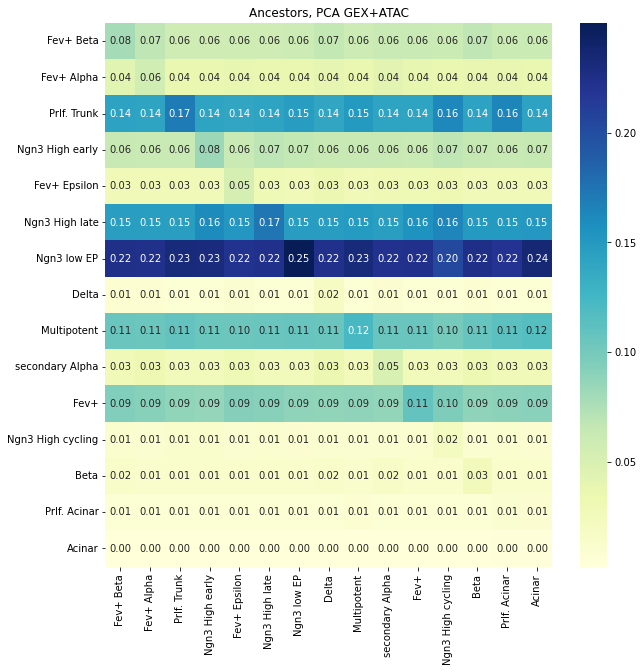

In [105]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(ct_anc, annot=True, cmap="YlGnBu", ax=ax, fmt=".2f", annot_kws={"fontsize": 10})
plt.title("Ancestors, PCA GEX+ATAC")
plt.show()

In [107]:
tp.cell_costs_source

,cell_cost_source
AAACAGCCAACAGCCT-1-0,-0.101696
AAACAGCCAACCCTCC-1-0,0.454478
AAACAGCCACCTGTAA-1-0,0.584158
AAACAGCCACTAAGCC-1-0,-0.144692
AAACAGCCAGGATAAC-1-0,-0.429829
...,...
TTTGTGTTCTTGTTCG-1-1,NaN
TTTGTTGGTATTGAGT-1-1,NaN
TTTGTTGGTCCTAAGA-1-1,NaN
TTTGTTGGTTAACAGT-1-1,NaN


In [108]:
sc.pl.umap(adata_gex, color=tp.cell_costs_source)

KeyError: "Could not find entry in `obsm` for 'umap'.\nAvailable keys are: ['ATAC_pca', 'ATAC_umap', 'GEX_pca', 'GEX_umap', 'X_pca']."

In [110]:
adata_gex

AnnData object with n_obs × n_vars = 16978 × 228321
    obs: 'n_counts', 'sample', 'int_id', 'reporter', 'log_cell_probs', 'cell_barcodes_du', 'cell_barcodes_cr', 'cell_barcodes', 'log_counts', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'total_counts_rank', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'log_nCount_ATAC', 'log_nFeature_ATAC', 'scrublet_scores', 'scrublet_doublets', 'scrublet_doublets_cat', 'dd_doublets', 'dd_scores', 'dd_log_p_values', 'dd_voting_average', 'dd_-log_p_values', 'dd_doublets_cat', 'pANN', 'DF_classifications_1', 'DF_classifications_2', 'pANN_SCT', 'DF_SCT_classifications_1', 'DF_SCT_classifications_2', 'df_doublets'